# (15) Rebuttal Fig -- Degree ranks (```KABA```)

**Motivation**: Plot degree ranks and degree vals using a shared color bar. <br>

In [1]:
# HIDE CODE


import os, sys
from IPython.display import display, Latex

# tmp & extras dir
git_dir = os.path.join(os.environ['HOME'], 'Dropbox/git')
extras_dir = os.path.join(git_dir, 'jb-Ca-fMRI/_extras')
fig_base_dir = os.path.join(git_dir, 'jb-Ca-fMRI/figs')
tmp_dir = os.path.join(git_dir, 'jb-Ca-fMRI/tmp')

# GitHub
sys.path.insert(0, os.path.join(git_dir, '_Ca-fMRI'))
from figures.fighelper import *
from analysis.final import *
from utils.render import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from tqdm.notebook import tqdm
%matplotlib inline
set_style()

In [2]:
# HIDE CODE


def default_props_anesth(
        num_k: int = 7,
        perc: int = 15,
        **kwargs, ):
    mice = Mice(512)
    mice.set_kws(
        desc_ca2='preproc',
        desc_bold='rabies-hp',
    )
    props_base = {
        'mice': mice,
        'num_k': num_k,
        'task': 'rest',
        'perc': f'p{perc}-sample',
        'metric': 'pearson',
        'sv_props': {
            'match_using': 'gam',
            'match_metric': 'euclidean'},
        'graph_type': 'real',
        'kw_kmeans': {'n_init': 100},
        'verbose': False,
    }
    kwargs = setup_kwargs(props_base, kwargs)
    props_ca = {'mode': 'ca2', **kwargs}
    return mice, props_ca

## Prep

In [3]:
mice = Mice(512)
mice.setup_func_data()
print(mice.kws)

bs = Base(mice, mode='ca2')
kws_show = show_kws(7)
pal = prepare_palette()
translation = {'BOLD': BOLD, 'CAS': CAS, 'CAF': CAF}

kws_fig = dict(bbox_inches='tight', dpi=900, transparent=True)
fig_dir = pjoin(fig_base_dir, 'rebuttal', 'degree')
print(fig_dir)

{
    'task': 'rest',
    'exclude': True,
    'runs_only': True,
    'band_ca2': (0.01, 5.0),
    'band_bold': (0.01, 0.5),
    'desc_ca2': 'preproc',
    'desc_bold': 'rabies-hp'
}

/home/hadi/Dropbox/git/jb-Ca-fMRI/figs/rebuttal/degree

## Load

In [4]:
d = np.load(
    pjoin(tmp_dir, 'degrees.npy'),
    allow_pickle=True,
).item()

dr = np.load(
    pjoin(tmp_dir, 'degree_ranks.npy'),
    allow_pickle=True,
).item()

## Plot

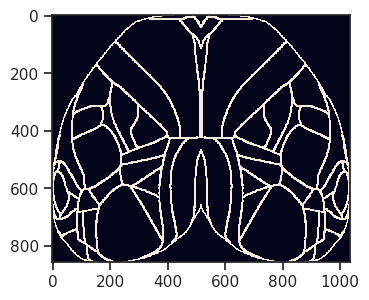

In [5]:
contour = bs.get_contour(0.2, 'top', False)
plt.imshow(contour);

### Degree ranks

In [6]:
{k: (np.nanmin(v), np.nanmax(v)) for k, v in dr.items()}

{
    'BOLD': (0.21269394878330333, 0.7681680279339376),
    'CAS': (0.07455426045514849, 0.9314761472712783),
    'CAF': (0.009846819005735, 0.9645000892574231)
}

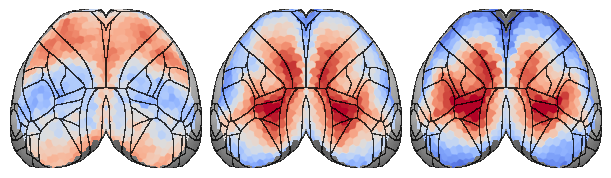

In [7]:
fig, _ = bs.show(
    data=np.stack([v for k, v in dr.items()]),
    vmin=0, vmax=0.9,
    figsize=(6, 2),
    cmap='coolwarm', 
    contour_cmap='Greys_r',
    layout='constrained',
    contour_coarse=False,
    titles=False,
)
fig.savefig(pjoin(fig_dir, 'deg_ranks.png'), **kws_fig)

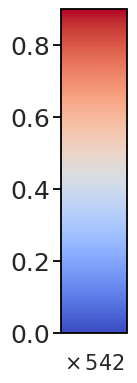

In [8]:
cmap = sns.color_palette('coolwarm', as_cmap=True)

fig, cax, cbar = cbar_only(cmap, vmin=0.0, vmax=0.9, figsize=(1.53, 4), tick_position='left')
cax.tick_params(labelsize=18)
cax.text(
    x=0.05,
    y=-0.1,
    fontsize=15,
    s=r"$\times \, 542$",
)

fig.savefig(pjoin(fig_dir, 'cbar_coolwarm_ranks.png'), **kws_fig)
fig

### Degree vals

In [9]:
{k: (np.nanmin(v), np.nanmax(v)) for k, v in d.items()}

{
    'BOLD': (42.44736842105263, 123.64545454545454),
    'CAS': (14.851063829787234, 161.45045045045046),
    'CAF': (1.5, 196.04504504504504)
}

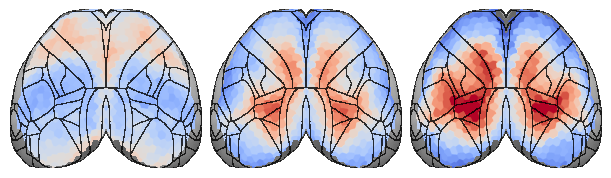

In [10]:
fig, _ = bs.show(
    data=np.stack([v for k, v in d.items()]),
    vmin=0, vmax=180,
    figsize=(6, 2),
    cmap='coolwarm', 
    contour_cmap='Greys_r',
    layout='constrained',
    contour_coarse=False,
    titles=False,
)
fig.savefig(pjoin(fig_dir, 'deg_vals.png'), **kws_fig)

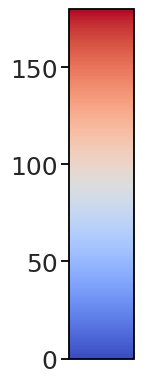

In [11]:
cmap = sns.color_palette('coolwarm', as_cmap=True)

fig, cax, cbar = cbar_only(cmap, vmin=0.0, vmax=180, figsize=(1.6, 4), tick_position='left')
cax.tick_params(labelsize=18)

fig.savefig(pjoin(fig_dir, 'cbar_coolwarm_vals.png'), **kws_fig)
fig